<a href="https://colab.research.google.com/github/KofiAnaan0/Modelling-Evaluation/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training
---
## 1. Import Packages

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

## 2. Load Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List files in the google drive
# !ls '/content/drive/MyDrive/'

#Load prediction dataset
df = pd.read_csv('/content/drive/MyDrive/data_for_predictions.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.0,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0


## 3. Model Training
---
- importing packages for modelling
- splitting the dataset into training & testing
- model training
---

In [ ]:
#importing packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# making a copy of the dataset
train_df = df.copy()

# separating target variables from independent variables
y = train_df['churn']
x = train_df.drop(columns=['churn', 'id'])

print(x.shape)
print(y.shape)

(14606, 61)
(14606,)


In [ ]:
# creating test & training dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10954, 61)
(3652, 61)
(10954,)
(3652,)


In [ ]:
# Importing the model
model = RandomForestClassifier(n_estimators=1000)

# model training
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

# Evaluation

In [ ]:
# Making predictions
prediction = model.predict(x_test)

# Comparision between actual values & predicted values
# df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
# df_compare.tail()

In [ ]:
# determing true negative, false negative, true positive & false positive
tn, fn, tp, fp = metrics.confusion_matrix(y_test, prediction).ravel()

# printing the results
print(y_test.value_counts())
print(f"True Negative(not churn): {tn}")
print(f"False Negative(churn): {fn}")
print(f"True Positive(churn): {tp}")
print(f"False Positive(not chrun): {fp}")

churn
0    3286
1     366
Name: count, dtype: int64
True Negative(not churn): 3283
False Negative(churn): 3
True Positive(churn): 348
False Positive(not chrun): 18


# Understanding the model

In [ ]:
# Creating a feature importance data frame
feature_importances = pd.DataFrame({
    'feature': x_train.columns,
    'feature_importance': model.feature_importances_
}).sort_values(by='feature_importance', ascending=True).reset_index()

feature_importances.head(3)

,index,feature,feature_importance
0,46,peak_mid_peak_fix_max_monthly_diff,0.001094
1,4,forecast_discount_energy,0.001241
2,30,var_6m_price_mid_peak_fix,0.002075


In [ ]:
len(feature_importances['feature'])

61

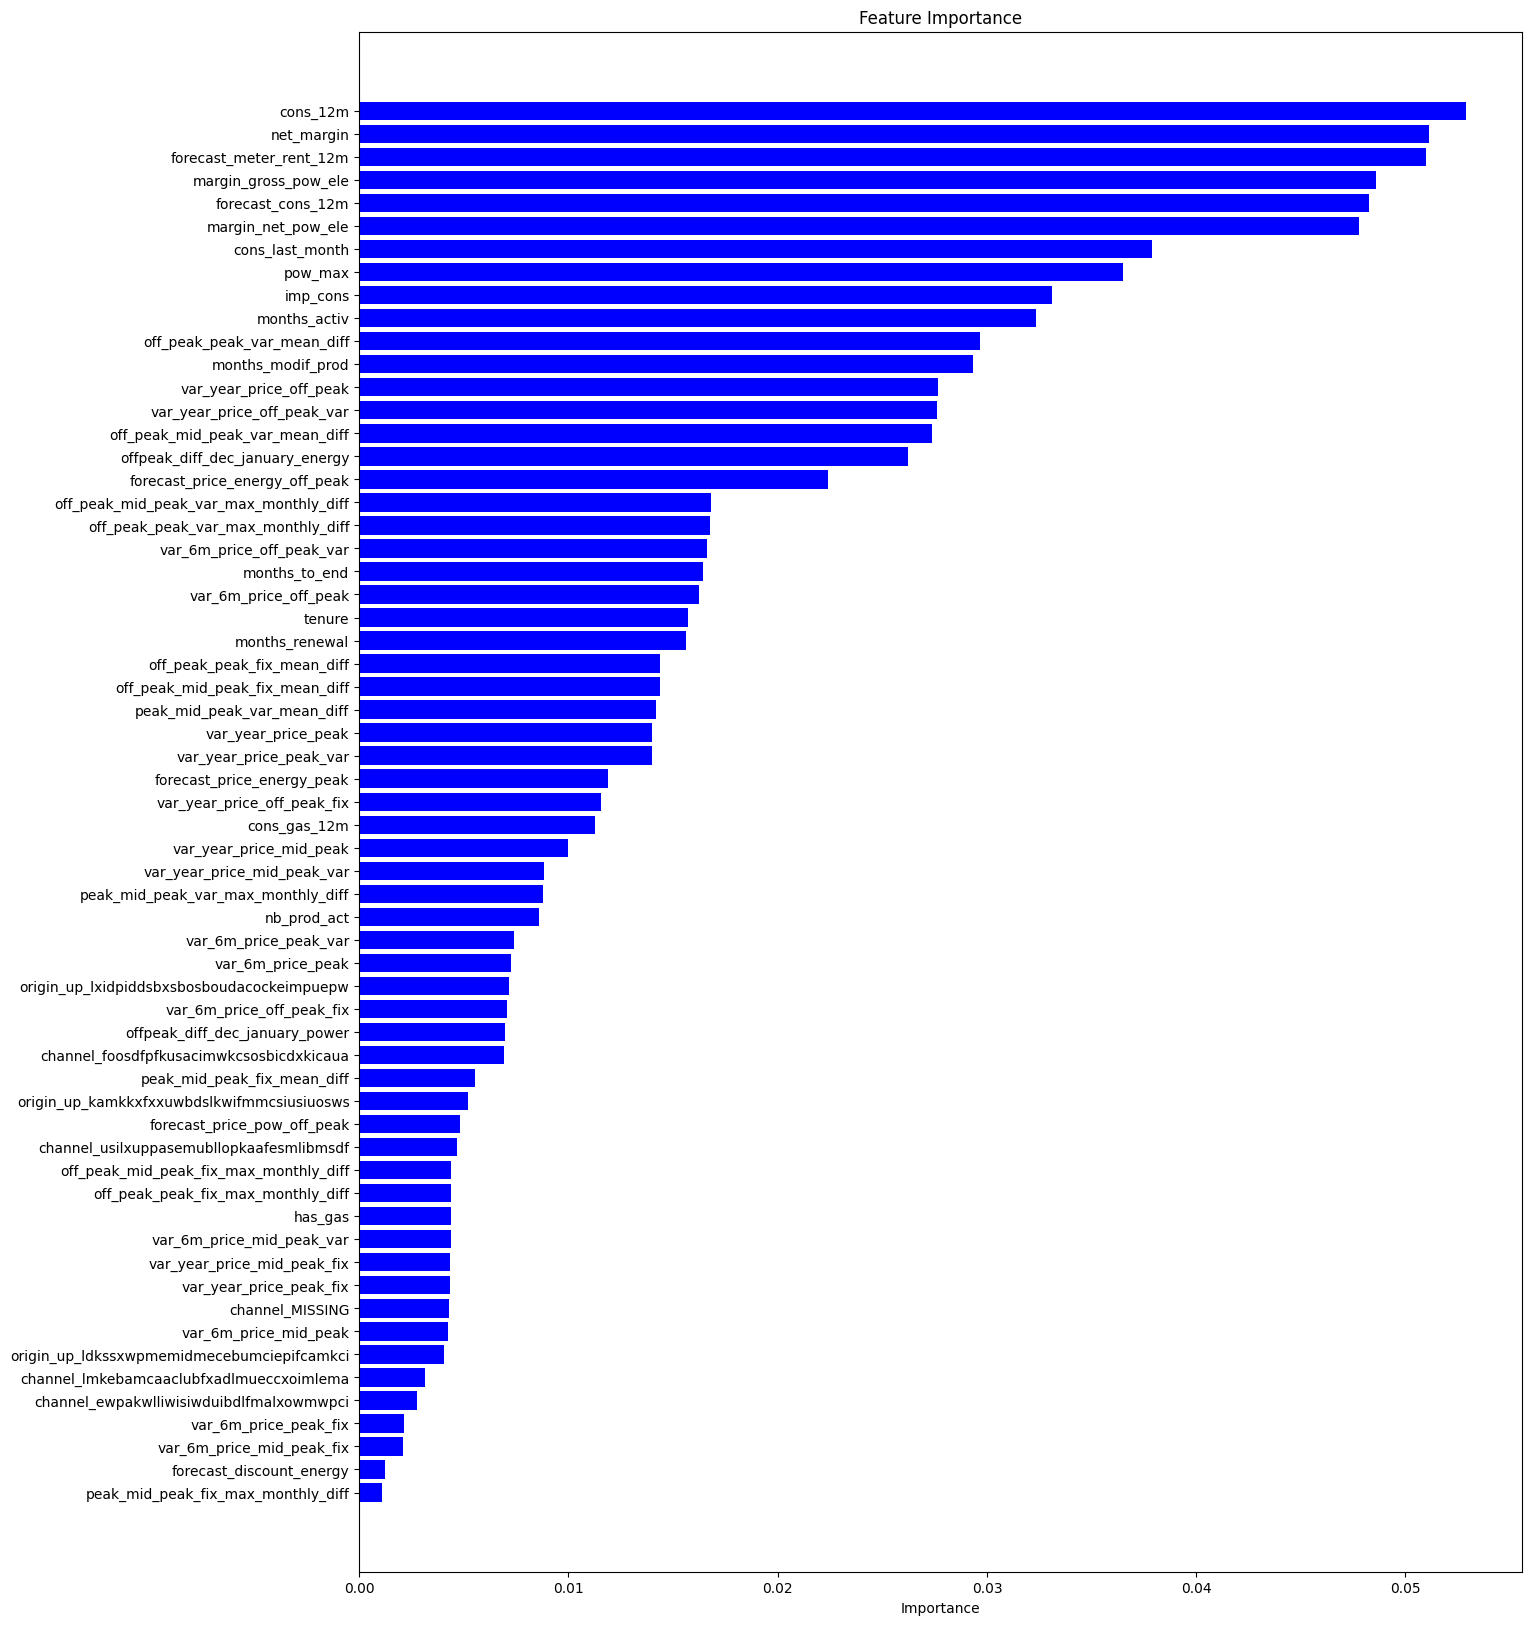

In [ ]:
# Visual representation of future importance
plt.figure(figsize=(15, 20))
plt.title('Feature Importance')
plt.barh(range(len(feature_importances)), feature_importances['feature_importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['feature'])
plt.xlabel('Importance')
plt.show()